In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
movies_df = pd.read_csv("ml-latest-small/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Question 1

In [4]:
total_users = ratings_df.userId.unique()
len(total_users)
all_pos_ratings = len(movies_df) * len(total_users)
sparsity = len(ratings_df) / all_pos_ratings
print("Total number of possible ratings:", all_pos_ratings)
print("Total number of available ratings:", len(ratings_df))
print("Sparsity", sparsity)

Total number of possible ratings: 5942620
Total number of available ratings: 100836
Sparsity 0.016968273253211548


## Question 2

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


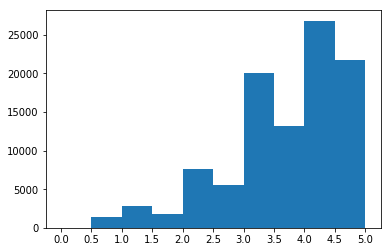

In [5]:
r_bins = [x / 10.0 for x in range(0, 51, 5)]
print(r_bins)
plt.hist(ratings_df.rating, bins=r_bins)
plt.xticks(r_bins)
plt.show()

The distribution is left skewed. People are more willing to rat the movies they like than rating the movies they displike.

## Question 3

In [61]:
movie_ratings = dict()
for i in range(len(ratings_df)):
    id = ratings_df.loc[i, "movieId"]
    if id in movie_ratings:
        movie_ratings[id] = movie_ratings[id] + 1
    else:
        movie_ratings[id] = 1

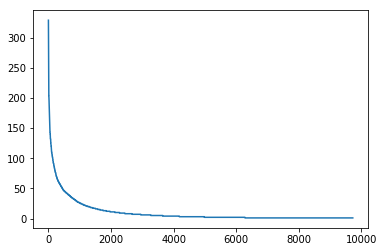

In [62]:
movie_lists = sorted(movie_ratings.items(), key=lambda x:-x[1]) #sorted by key
x_id,y_cnt = zip(*movie_lists)
xs = range(len(x_id))
plt.plot(xs, y_cnt)
plt.show()

## Question 4

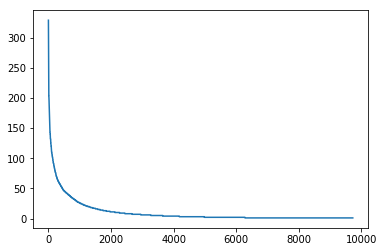

In [65]:
user_cnt = dict()
for i in range(len(ratings_df)):
    id = ratings_df.loc[i, "userId"]
    if id in user_cnt:
        user_cnt[id] = user_cnt[id] + 1
    else:
        user_cnt[id] = 1
user_list = sorted(user_cnt.items(), key=lambda x:-x[1])
user_list
u_id,y_cnt = zip(*movie_lists)
xs = range(len(u_id))
plt.plot(xs, y_cnt)
plt.show()

## Question 5

The distribution has a really long tail, and this means that only a small portion of the movies have lots of ratings most of the movies have a small number of ratings. This means that the matrix is very sparse. The sparse matrix limits the coverage of neighborhood-based methods, and this creates challenges for robust similarity computation.

## Question 6

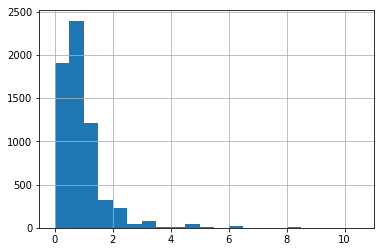

In [89]:
movie_var = ratings_df.groupby(['movieId'])['rating'].var()
movie_var.head()
max_var = movie_var.max()
min_var = movie_var.min()
v_bins = [i / 10.0 for i in range(0, 106, 5)]
movie_var.hist(bins=v_bins)
# plt.xticks(v_bins)
plt.show()

The distribution means that the ratings on the movies are very consistent. Most of the movie have very low variance, and only small amount of movie have high variance in terms of reviews.

## Question 7

$\mu_u = \frac{\Sigma_{k \in I_u}}{|I_u|}$

## Question 8

This means the set of items have been rated both by user u and user v. When the two sets are disjoint these two sets have not purchased any common item.